<a href="https://colab.research.google.com/github/LGavin1/Stock-Price-Predictor/blob/main/XAI_ALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls /content/drive/MyDrive/XAI/ALS

ALS_FINAL.csv  ALS_Pro1.csv  ALS_Pro_Fin.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
ALS = pd.read_csv('/content/drive/MyDrive/XAI/ALS/ALS_Pro_Fin.csv', index_col=0)

In [ ]:
ALS.head()

Q1_Speech  Q2_Salivation  Q3_Swallowing  Q4_Handwriting  \
1          4              3              4               3   
2          0              2              2               4   
3          3              3              2               3   
4          3              3              3               3   
5          2              3              3               0   

   Q5a_Cutting_without_Gastrostomy  Q6_Dressing_and_Hygiene  \
1                                2                        3   
2                                3                        3   
3                                3                        4   
4                                4                        3   
5                                1                        0   

   Q7_Turning_in_Bed  Q8_Walking  Q9_Climbing_Stairs  Q10_Respiratory  ...  \
1                  3           2                   1                3  ...   
2                  4           4                   3                3  ...   
3                  4           4                   4                4  ...   
4                  4           4                   3                3  ...   
5                  2           2                   1                4  ...   

   Other_Onset  FVC_Subject_Liters  Forced_Vital_Capacity_Delta  \
1            0            2.543750                   121.875000   
2            0            1.840000                     6.000000   
3            0            2.563333                   240.333333   
4            0            2.398571                    90.000000   
5            0            3.593846                   228.615385   

   Blood_Pressure_Diastolic  Blood_Pressure_Systolic      Pulse  \
1                 80.186447               129.151085  77.858276   
2                 82.618645               138.615108  71.585828   
3                 75.833333               129.583333  77.333333   
4                 80.186447               129.151085  77.858276   
5                 74.923077               110.230769  72.307692   

   Respiratory_Rate     Weight  Vital_Signs_Delta  Blood_Urea_Nitrogen_BUN  
1         24.698752  47.620427         126.903939                 0.140631  
2         17.408378  52.276555         125.475121                 0.547650  
3         15.583333  68.050000         240.333333                 0.355321  
4         25.756982  57.580463         104.562601                 0.249485  
5         20.000000  92.566581         228.615385                 0.325982  

[5 rows x 30 columns]

In [ ]:
ALS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3995 entries, 1 to 4054
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Q1_Speech                        3995 non-null   int64  
 1   Q2_Salivation                    3995 non-null   int64  
 2   Q3_Swallowing                    3995 non-null   int64  
 3   Q4_Handwriting                   3995 non-null   int64  
 4   Q5a_Cutting_without_Gastrostomy  3995 non-null   int64  
 5   Q6_Dressing_and_Hygiene          3995 non-null   int64  
 6   Q7_Turning_in_Bed                3995 non-null   int64  
 7   Q8_Walking                       3995 non-null   int64  
 8   Q9_Climbing_Stairs               3995 non-null   int64  
 9   Q10_Respiratory                  3995 non-null   int64  
 10  ALSFRS_Delta                     3995 non-null   int64  
 11  ALSFRS_Total                     3995 non-null   int64  
 12  ALSFRS_Slope             

In [ ]:
ALS.describe().T

count        mean         std          min  \
Q1_Speech                        3995.0    2.933417    1.191933     0.000000   
Q2_Salivation                    3995.0    3.212015    1.004425     0.000000   
Q3_Swallowing                    3995.0    3.292365    0.925697     0.000000   
Q4_Handwriting                   3995.0    2.584981    1.215603     0.000000   
Q5a_Cutting_without_Gastrostomy  3995.0    2.324656    1.216223     0.000000   
Q6_Dressing_and_Hygiene          3995.0    2.141427    1.138736     0.000000   
Q7_Turning_in_Bed                3995.0    2.676345    1.094269     0.000000   
Q8_Walking                       3995.0    2.385232    1.014187     0.000000   
Q9_Climbing_Stairs               3995.0    1.535670    1.328934     0.000000   
Q10_Respiratory                  3995.0    3.501126    0.656378     0.000000   
ALSFRS_Delta                     3995.0  133.263830   40.231926     3.000000   
ALSFRS_Total                     3995.0   26.393492    6.609681     3.000000   
ALSFRS_Slope                     3995.0   -0.031262    0.036594    -0.500000   
Age                              3995.0   55.351089   11.763826    21.000000   
Sex                              3995.0    0.620275    0.485379     0.000000   
Onset_Delta                      3995.0 -708.010763  464.294804 -8741.000000   
Bulbar_Onset                     3995.0    0.122653    0.328080     0.000000   
Limb_Bulbar_Onset                3995.0    0.004005    0.063166     0.000000   
Limb_Onset                       3995.0    0.426783    0.494672     0.000000   
Spine_Onset                      3995.0    0.000000    0.000000     0.000000   
Other_Onset                      3995.0    0.000000    0.000000     0.000000   
FVC_Subject_Liters               3995.0    2.912485    1.112886     0.000000   
Forced_Vital_Capacity_Delta      3995.0  134.288887   79.326594  -173.000000   
Blood_Pressure_Diastolic         3995.0   80.497082    6.678612    49.333333   
Blood_Pressure_Systolic          3995.0  129.446436   11.091889    92.400000   
Pulse                            3995.0   78.103143    7.666938    50.250000   
Respiratory_Rate                 3995.0   18.307353    2.614202    10.756982   
Weight                           3995.0   73.364331   14.177905    38.058333   
Vital_Signs_Delta                3995.0  144.735920   64.501839     7.600000   
Blood_Urea_Nitrogen_BUN          3995.0    0.480291    0.384924     0.000000   

                                        25%         50%         75%  \
Q1_Speech                          2.000000    3.000000    4.000000   
Q2_Salivation                      3.000000    4.000000    4.000000   
Q3_Swallowing                      3.000000    4.000000    4.000000   
Q4_Handwriting                     2.000000    3.000000    3.000000   
Q5a_Cutting_without_Gastrostomy    1.000000    2.000000    3.000000   
Q6_Dressing_and_Hygiene            1.000000    2.000000    3.000000   
Q7_Turning_in_Bed                  2.000000    3.000000    4.000000   
Q8_Walking                         2.000000    2.000000    3.000000   
Q9_Climbing_Stairs                 0.000000    1.000000    3.000000   
Q10_Respiratory                    3.000000    4.000000    4.000000   
ALSFRS_Delta                     117.000000  142.000000  161.000000   
ALSFRS_Total                      22.000000   27.000000   31.000000   
ALSFRS_Slope                      -0.043459   -0.024138   -0.010558   
Age                               47.000000   56.000000   64.000000   
Sex                                0.000000    1.000000    1.000000   
Onset_Delta                     -929.500000 -583.000000 -377.000000   
Bulbar_Onset                       0.000000    0.000000    0.000000   
Limb_Bulbar_Onset                  0.000000    0.000000    0.000000   
Limb_Onset                         0.000000    0.000000    1.000000   
Spine_Onset                        0.000000    0.000000    0.000000   
Other_Onset                        0.000000    0.000000    0.0

# **FFNN**

Import Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

Feature and Target Selection

In [ ]:
features = ALS[['ALSFRS_Total','Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5a_Cutting_without_Gastrostomy', 'Q6_Dressing_and_Hygiene',  'Q7_Turning_in_Bed', 'Q8_Walking',	'Q9_Climbing_Stairs',  'Q10_Respiratory',	'ALSFRS_Delta', 'Age',  'Sex',  'Onset_Delta', 'Bulbar_Onset', 'Limb_Bulbar_Onset', 'Limb_Onset',  'Spine_Onset', 'Other_Onset', 'FVC_Subject_Liters', 'Forced_Vital_Capacity_Delta', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Systolic', 'Pulse', 'Respiratory_Rate', 'Weight', 'Vital_Signs_Delta','Blood_Urea_Nitrogen_BUN']]  # Example feature columns
target = ALS['ALSFRS_Slope']  # target column

Normalise Data

In [ ]:
scaler = MinMaxScaler()
features_scaled =scaler.fit_transform(features)

Split Data

In [ ]:
# Reshape for the model [samples, timesteps, features]
X = features_scaled
y = target.values

# Ensure y is the correct shape
y = y.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define RMSD

In [ ]:
def root_mean_squared_deviation(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

Build Model

In [ ]:
def create_ffnn(input_shape):
    model = Sequential()

    # First dense layer
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.1))

    # Second dense layer
    model.add(Dense(16, activation='tanh'))
    model.add(Dropout(0.1))

    # Third dense layer
    model.add(Dense(8, activation='tanh'))
    model.add(Dropout(0.05))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error', root_mean_squared_deviation])

    return model

Train

In [ ]:
model = create_ffnn(X_train.shape[1])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/200
80/80 - 4s - loss: 0.0278 - mean_absolute_error: 0.1227 - mean_squared_error: 0.0278 - root_mean_squared_deviation: 0.1536 - val_loss: 0.0027 - val_mean_absolute_error: 0.0409 - val_mean_squared_error: 0.0027 - val_root_mean_squared_deviation: 0.0516 - 4s/epoch - 55ms/step
Epoch 2/200
80/80 - 0s - loss: 0.0034 - mean_absolute_error: 0.0433 - mean_squared_error: 0.0034 - root_mean_squared_deviation: 0.0564 - val_loss: 0.0013 - val_mean_absolute_error: 0.0222 - val_mean_squared_error: 0.0013 - val_root_mean_squared_deviation: 0.0330 - 326ms/epoch - 4ms/step
Epoch 3/200
80/80 - 0s - loss: 0.0014 - mean_absolute_error: 0.0251 - mean_squared_error: 0.0014 - root_mean_squared_deviation: 0.0361 - val_loss: 0.0011 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 0.0011 - val_root_mean_squared_deviation: 0.0307 - 280ms/epoch - 3ms/step
Epoch 4/200
80/80 - 0s - loss: 0.0012 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0012 - root_mean_squared_deviation: 0.0326 - v

Evaluate Model

In [ ]:
test_loss, test_mae, test_mse, test_rmsd = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSD: {test_rmsd}')

25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0192 - mean_squared_error: 0.0012 - root_mean_squared_deviation: 0.0317    
Test Loss: 0.0012041623704135418, Test MAE: 0.01924416609108448, Test MSE: 0.0012041623704135418, Test RMSD: 0.03173482045531273


Visualise Training History

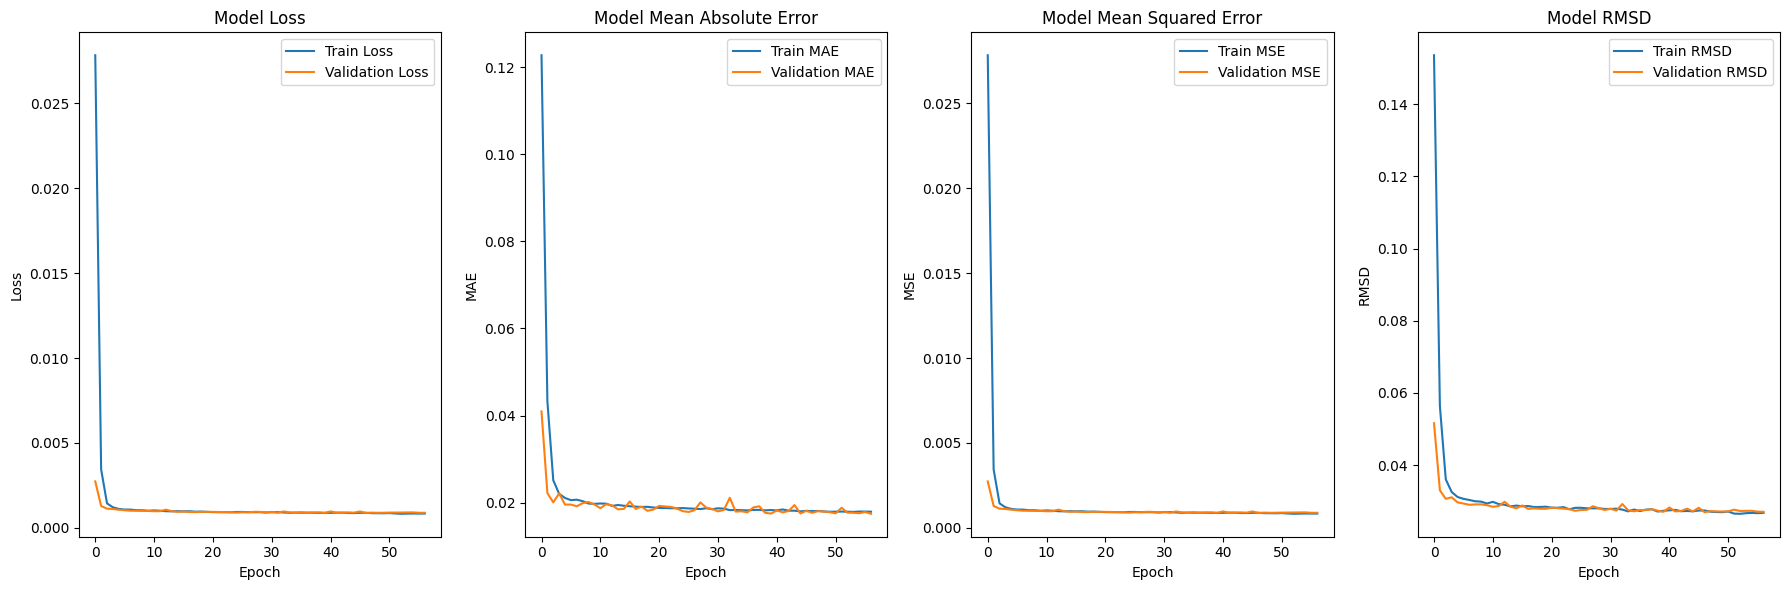

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(18, 6))

# Plot training & validation loss values
plt.subplot(1, 4, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation mean absolute error values
plt.subplot(1, 4, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation mean squared error values
plt.subplot(1, 4, 3)
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation RMSD values
plt.subplot(1, 4, 4)
plt.plot(history.history['root_mean_squared_deviation'], label='Train RMSD')
plt.plot(history.history['val_root_mean_squared_deviation'], label='Validation RMSD')
plt.title('Model RMSD')
plt.ylabel('RMSD')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr


# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Flatten y_test if necessary
y_test_flat = y_test.flatten()

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_pred, y_test_flat)

print(f"Pearson Correlation Coefficient: {pearson_corr}")

25/25 [==============================] - 0s 1ms/step
Pearson Correlation Coefficient: 0.5268995423700099


# Shap

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import shap

# Select a set of background examples to take an expectation over
background = X_train[:100]
explainer = shap.DeepExplainer(model, background)

# Explain model predictions using test set
shap_values = explainer.shap_values(X_test[:10])

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Shape of SHAP values: (29, 1)
Shape of features: (30, 29)
<class 'numpy.ndarray'>
[(29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1)]
Reshaped SHAP val

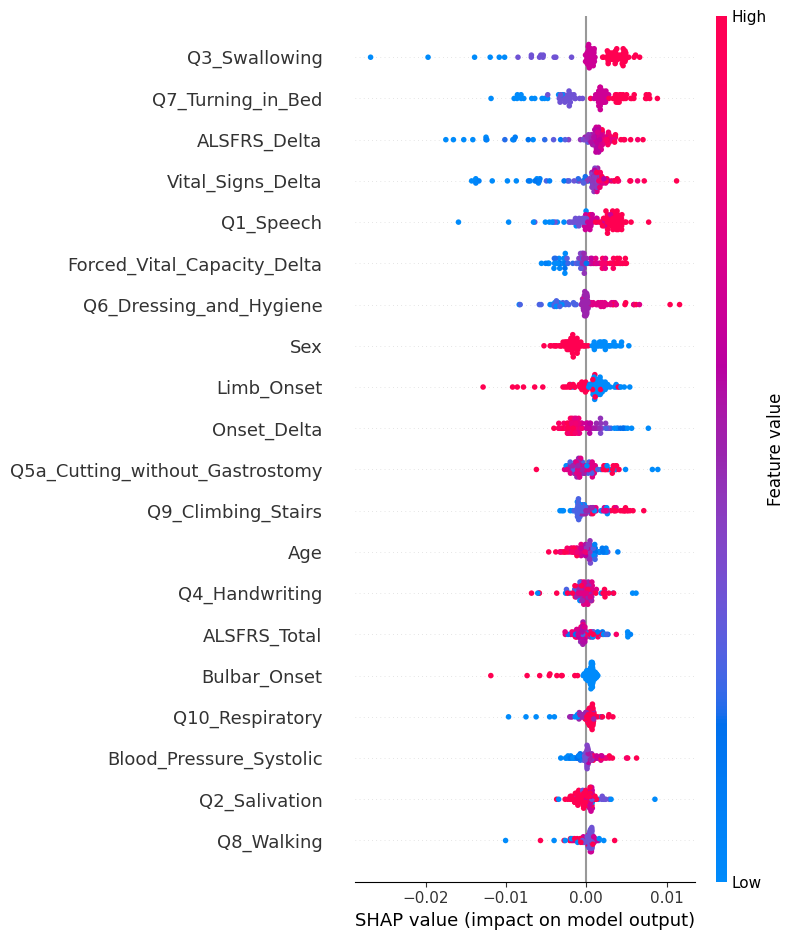

In [ ]:
# Assuming `features` DataFrame and `ALS` DataFrame are already defined
features = ALS[['ALSFRS_Total','Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5a_Cutting_without_Gastrostomy', 'Q6_Dressing_and_Hygiene',  'Q7_Turning_in_Bed', 'Q8_Walking',	'Q9_Climbing_Stairs',  'Q10_Respiratory',	'ALSFRS_Delta', 'Age',  'Sex',  'Onset_Delta', 'Bulbar_Onset', 'Limb_Bulbar_Onset', 'Limb_Onset',  'Spine_Onset', 'Other_Onset', 'FVC_Subject_Liters', 'Forced_Vital_Capacity_Delta', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Systolic', 'Pulse', 'Respiratory_Rate', 'Weight', 'Vital_Signs_Delta','Blood_Urea_Nitrogen_BUN']]
feature_names = features.columns.tolist()

# Print the shapes of SHAP values and features
print("Shape of SHAP values:", np.array(correct_shap_values).shape)
print("Shape of features:", X_test[:30].shape)

# Compute SHAP values
shap_values_output = explainer.shap_values(X_test[:100])

# For binary classification or single-output models, shap_values_output should be a list with one or two elements
print(type(shap_values_output))
print([np.array(values).shape for values in shap_values_output])

# Assuming shap_values_output correctly contains your SHAP values for plotting
correct_shap_values = shap_values_output[0]  # Adjust based on your model's specifics

# Convert list of arrays to a single array
reshaped_shap_values = np.concatenate([np.array(vals).reshape(1, -1) for vals in shap_values_output], axis=0)

# Now reshaped_shap_values should have the shape (10, 20), matching X_test[:10]
print("Reshaped SHAP values shape:", reshaped_shap_values.shape)

# Plot summary of SHAP values with actual feature names
shap.summary_plot(reshaped_shap_values, X_test[:100], feature_names=feature_names)

PermutationExplainer explainer: 800it [00:52, 13.25it/s]                         


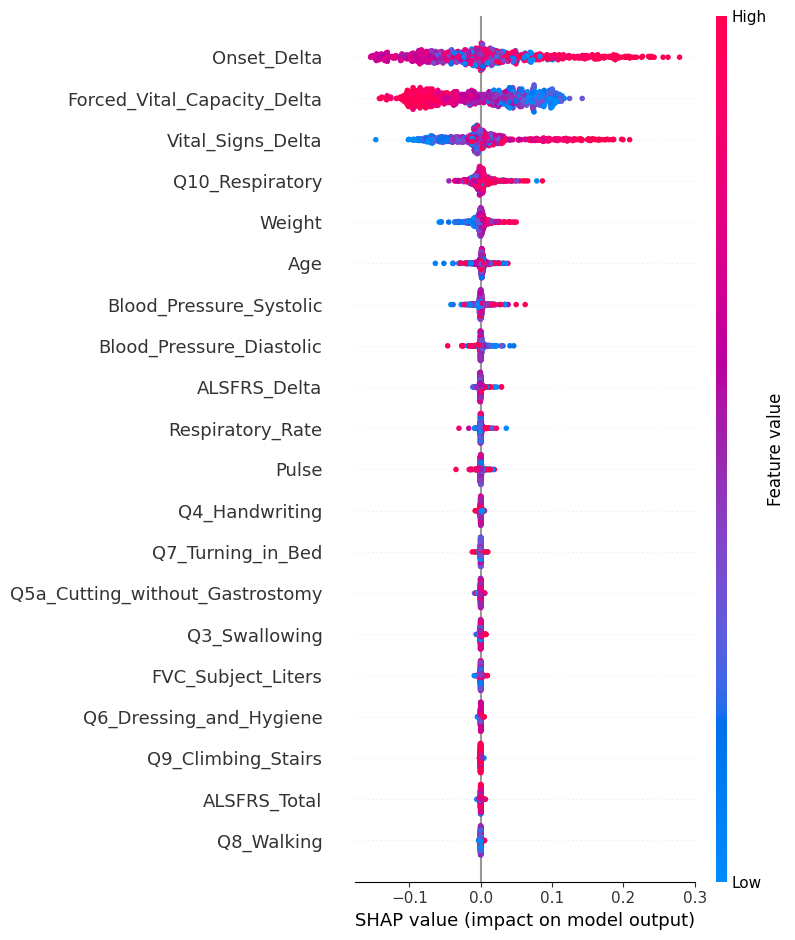

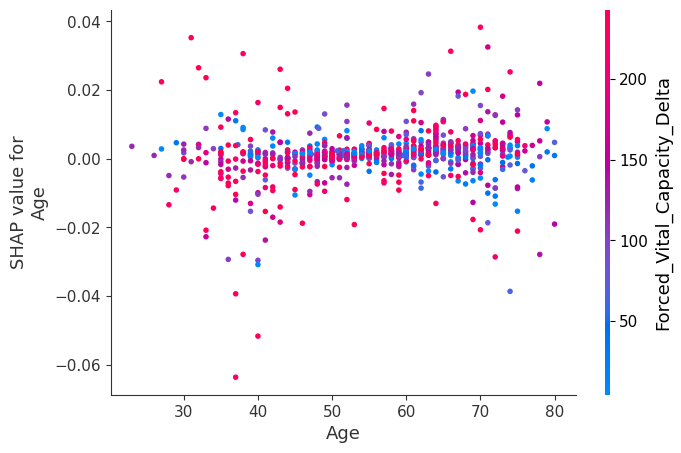

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Plot Partial Dependence Plot for 'Age'
shap.dependence_plot('Q3_Swallowing', shap_values.values, X_test, feature_names=feature_names)

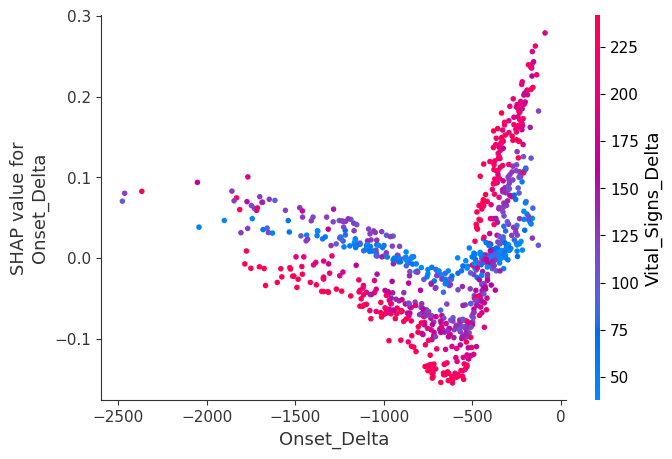

In [ ]:
shap.dependence_plot('Onset_Delta', shap_values.values, X_test, feature_names=feature_names)

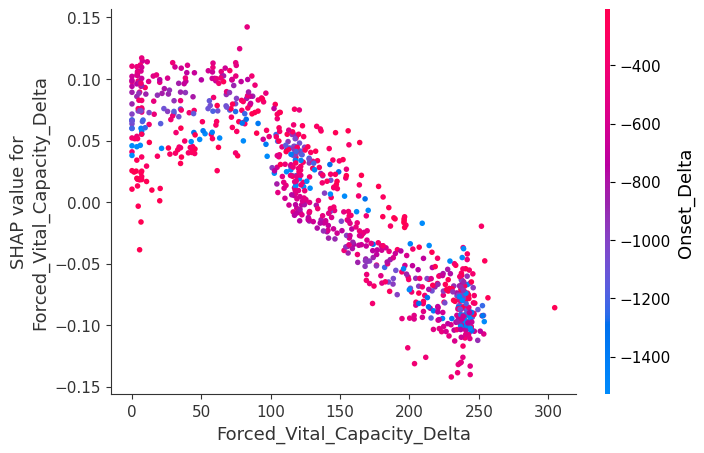

In [ ]:
shap.dependence_plot('Forced_Vital_Capacity_Delta', shap_values.values, X_test, feature_names=feature_names)

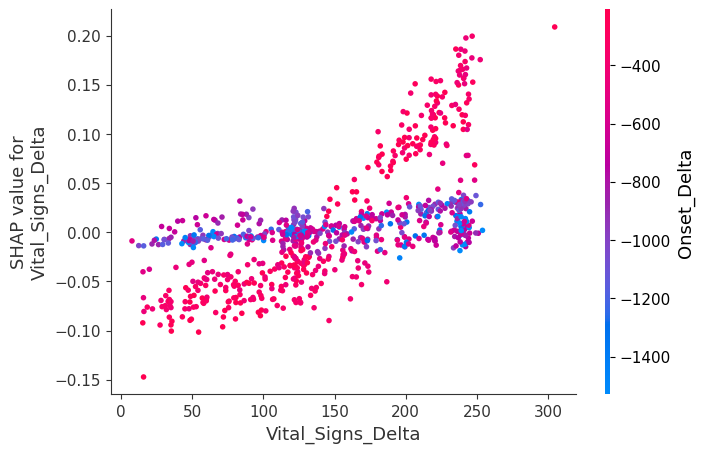

In [ ]:
shap.dependence_plot('Vital_Signs_Delta', shap_values.values, X_test, feature_names=feature_names)

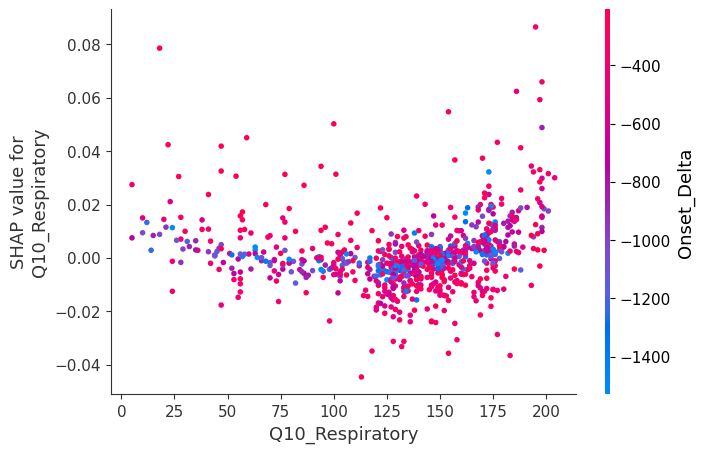

In [ ]:
shap.dependence_plot('Q10_Respiratory', shap_values.values, X_test, feature_names=feature_names)

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 6/799 [00:00<?, ?it/s]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|          | 8/799 [00:13<12:04,  1.09it/s]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|          | 9/799 [00:15<17:16,  1.31s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 10/799 [00:17<19:46,  1.50s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏         | 11/799 [00:18<20:59,  1.60s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 12/799 [00:20<21:39,  1.65s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 13/799 [00:22<22:14,  1.70s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 14/799 [00:24<23:10,  1.77s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 15/799 [00:26<23:18,  1.78s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 16/799 [00:27<23:14,  1.78s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 17/799 [00:29<23:34,  1.81s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏         | 18/799 [00:31<23:30,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 19/799 [00:33<23:56,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 20/799 [00:35<23:48,  1.83s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 21/799 [00:37<23:41,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 22/799 [00:39<23:42,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 23/799 [00:40<24:06,  1.86s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 24/799 [00:42<24:28,  1.89s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎         | 25/799 [00:44<24:02,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 26/799 [00:46<23:40,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 27/799 [00:48<24:05,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▎         | 28/799 [00:50<23:40,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎         | 29/799 [00:51<23:16,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 30/799 [00:53<23:10,  1.81s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 31/799 [00:55<23:11,  1.81s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 32/799 [00:57<23:12,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 33/799 [00:59<23:03,  1.81s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 34/799 [01:01<23:18,  1.83s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍         | 35/799 [01:02<23:25,  1.84s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 36/799 [01:04<23:24,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 37/799 [01:06<23:12,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▍         | 38/799 [01:08<23:10,  1.83s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 39/799 [01:10<23:07,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 40/799 [01:12<23:22,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 41/799 [01:14<23:41,  1.88s/it]

77/77 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 42/799 [01:15<23:23,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 43/799 [01:17<23:44,  1.88s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 44/799 [01:19<23:37,  1.88s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 45/799 [01:21<23:22,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 46/799 [01:23<23:23,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 47/799 [01:25<23:26,  1.87s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 48/799 [01:27<23:12,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 49/799 [01:28<23:04,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 50/799 [01:30<22:56,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 51/799 [01:32<22:49,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 52/799 [01:34<23:08,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 53/799 [01:36<23:20,  1.88s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 54/799 [01:38<23:15,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 55/799 [01:40<23:01,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 56/799 [01:41<22:59,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 57/799 [01:43<22:50,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 58/799 [01:45<22:35,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▋         | 59/799 [01:47<23:58,  1.94s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 60/799 [01:49<23:39,  1.92s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 61/799 [01:51<23:37,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 62/799 [01:53<23:40,  1.93s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 63/799 [01:55<23:46,  1.94s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 64/799 [01:57<23:36,  1.93s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 65/799 [01:59<23:26,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 66/799 [02:01<23:27,  1.92s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 67/799 [02:03<23:26,  1.92s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 68/799 [02:04<23:08,  1.90s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▊         | 69/799 [02:06<23:17,  1.91s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 70/799 [02:08<23:19,  1.92s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 71/799 [02:10<22:54,  1.89s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 72/799 [02:12<22:20,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 73/799 [02:14<22:22,  1.85s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 74/799 [02:16<23:14,  1.92s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 75/799 [02:18<22:53,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 76/799 [02:20<22:53,  1.90s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 77/799 [02:21<22:40,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 78/799 [02:23<22:59,  1.91s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 79/799 [02:25<22:49,  1.90s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 80/799 [02:27<22:33,  1.88s/it]

77/77 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 81/799 [02:29<22:24,  1.87s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 82/799 [02:31<22:38,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 83/799 [02:33<22:51,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 84/799 [02:35<22:36,  1.90s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 85/799 [02:37<22:33,  1.90s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 86/799 [02:38<22:29,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 87/799 [02:40<22:42,  1.91s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 88/799 [02:42<22:34,  1.90s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 89/799 [02:44<22:37,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 90/799 [02:46<22:25,  1.90s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█▏        | 91/799 [02:48<22:21,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 92/799 [02:50<22:43,  1.93s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 93/799 [02:52<22:15,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 94/799 [02:54<22:35,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 95/799 [02:56<22:25,  1.91s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 96/799 [02:58<22:34,  1.93s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 97/799 [02:59<22:01,  1.88s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 98/799 [03:01<21:45,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▏        | 99/799 [03:03<21:40,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 100/799 [03:05<21:23,  1.84s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 101/799 [03:07<21:50,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 102/799 [03:09<22:03,  1.90s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 103/799 [03:11<21:45,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 104/799 [03:13<21:40,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 105/799 [03:14<21:37,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 106/799 [03:16<21:32,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 107/799 [03:18<21:31,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 108/799 [03:20<22:00,  1.91s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 109/799 [03:22<21:42,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 110/799 [03:24<21:27,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 111/799 [03:26<21:14,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 112/799 [03:28<21:28,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 113/799 [03:29<21:34,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 114/799 [03:31<21:44,  1.90s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 115/799 [03:34<23:01,  2.02s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 116/799 [03:36<22:49,  2.01s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 117/799 [03:37<22:13,  1.96s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 118/799 [03:39<21:47,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▍        | 119/799 [03:41<21:52,  1.93s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 120/799 [03:43<21:41,  1.92s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 121/799 [03:45<22:02,  1.95s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 122/799 [03:47<21:41,  1.92s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 123/799 [03:49<21:51,  1.94s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 124/799 [03:51<21:41,  1.93s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 125/799 [03:53<21:33,  1.92s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 126/799 [03:55<21:37,  1.93s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 127/799 [03:57<21:41,  1.94s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 128/799 [03:59<21:35,  1.93s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 129/799 [04:01<21:36,  1.93s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 130/799 [04:02<21:30,  1.93s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 131/799 [04:04<21:17,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 132/799 [04:06<21:13,  1.91s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 133/799 [04:08<21:15,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 134/799 [04:10<21:18,  1.92s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 135/799 [04:12<20:59,  1.90s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 136/799 [04:14<20:39,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 137/799 [04:16<20:32,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 138/799 [04:18<20:44,  1.88s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 139/799 [04:19<20:29,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 140/799 [04:21<20:11,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 141/799 [04:23<20:25,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 142/799 [04:25<20:22,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 143/799 [04:27<20:09,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 144/799 [04:29<20:12,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 145/799 [04:30<19:56,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 146/799 [04:32<19:50,  1.82s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 147/799 [04:34<20:11,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 148/799 [04:36<20:14,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▊        | 149/799 [04:38<19:58,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 150/799 [04:40<20:11,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 151/799 [04:42<20:01,  1.85s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 152/799 [04:43<19:36,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 153/799 [04:45<19:28,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 154/799 [04:47<19:17,  1.79s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 155/799 [04:49<19:32,  1.82s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 156/799 [04:51<19:41,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 157/799 [04:52<19:36,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 158/799 [04:54<19:27,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 159/799 [04:56<19:30,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 160/799 [04:58<19:26,  1.83s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 161/799 [05:00<19:08,  1.80s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 162/799 [05:01<19:13,  1.81s/it]

77/77 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 163/799 [05:03<19:03,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 164/799 [05:05<19:07,  1.81s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 165/799 [05:07<19:14,  1.82s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 166/799 [05:09<19:07,  1.81s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 167/799 [05:10<19:02,  1.81s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 168/799 [05:12<19:19,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 169/799 [05:14<19:19,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 170/799 [05:16<19:01,  1.81s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██▏       | 171/799 [05:18<18:49,  1.80s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 172/799 [05:19<18:33,  1.78s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 173/799 [05:21<18:39,  1.79s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 174/799 [05:23<18:37,  1.79s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 175/799 [05:25<18:36,  1.79s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 176/799 [05:27<18:54,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 177/799 [05:29<18:49,  1.82s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 178/799 [05:30<18:44,  1.81s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 179/799 [05:32<18:35,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 180/799 [05:34<18:50,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 181/799 [05:36<19:11,  1.86s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 182/799 [05:38<19:13,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 183/799 [05:40<19:12,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 184/799 [05:41<18:47,  1.83s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 185/799 [05:43<18:22,  1.80s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 186/799 [05:45<18:15,  1.79s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 187/799 [05:47<18:33,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▎       | 188/799 [05:49<18:35,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 189/799 [05:51<18:36,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 190/799 [05:53<20:32,  2.02s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 191/799 [05:55<20:08,  1.99s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 192/799 [05:57<19:39,  1.94s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 193/799 [05:59<19:16,  1.91s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 194/799 [06:00<19:00,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 195/799 [06:02<19:11,  1.91s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 196/799 [06:04<19:13,  1.91s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 197/799 [06:06<18:57,  1.89s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 198/799 [06:08<18:37,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 199/799 [06:10<18:25,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 200/799 [06:12<18:23,  1.84s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 201/799 [06:13<18:12,  1.83s/it]

77/77 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 202/799 [06:15<18:11,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 203/799 [06:17<18:43,  1.89s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 204/799 [06:19<18:30,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 205/799 [06:21<18:14,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 206/799 [06:23<18:26,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 207/799 [06:25<18:10,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 208/799 [06:26<17:54,  1.82s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 209/799 [06:28<18:17,  1.86s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 210/799 [06:30<18:19,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 211/799 [06:32<18:13,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 212/799 [06:34<18:02,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 213/799 [06:36<17:54,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 214/799 [06:37<17:51,  1.83s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 215/799 [06:39<17:48,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 216/799 [06:41<17:46,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 217/799 [06:43<17:36,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 218/799 [06:45<17:23,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 219/799 [06:46<17:34,  1.82s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 220/799 [06:48<17:46,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 221/799 [06:50<17:36,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 222/799 [06:52<17:46,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 223/799 [06:54<17:46,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 224/799 [06:56<17:50,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 225/799 [06:58<17:59,  1.88s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 226/799 [07:00<17:49,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 227/799 [07:01<17:41,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 228/799 [07:03<17:46,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▊       | 229/799 [07:05<17:50,  1.88s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 230/799 [07:07<17:55,  1.89s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 231/799 [07:09<17:37,  1.86s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 232/799 [07:11<17:51,  1.89s/it]

77/77 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 233/799 [07:13<17:41,  1.88s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 234/799 [07:15<17:41,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 235/799 [07:16<17:39,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 236/799 [07:18<17:41,  1.89s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 237/799 [07:20<17:43,  1.89s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 238/799 [07:22<17:38,  1.89s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 239/799 [07:24<17:26,  1.87s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 240/799 [07:26<17:36,  1.89s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 241/799 [07:28<17:26,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 242/799 [07:30<17:31,  1.89s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 243/799 [07:32<17:56,  1.94s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 244/799 [07:34<17:30,  1.89s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 245/799 [07:35<17:15,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 246/799 [07:37<17:09,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 247/799 [07:39<16:58,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 248/799 [07:41<16:59,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 249/799 [07:43<17:05,  1.86s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 250/799 [07:45<17:05,  1.87s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 251/799 [07:46<16:44,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 252/799 [07:48<16:53,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 253/799 [07:50<17:01,  1.87s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 254/799 [07:52<17:12,  1.89s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 255/799 [07:54<16:53,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 256/799 [07:56<16:58,  1.88s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 257/799 [07:58<16:52,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 258/799 [08:00<16:52,  1.87s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 259/799 [08:01<16:32,  1.84s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 260/799 [08:03<16:17,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 261/799 [08:05<16:24,  1.83s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 262/799 [08:07<16:19,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 263/799 [08:09<16:25,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 264/799 [08:10<16:27,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 265/799 [08:12<16:19,  1.83s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 266/799 [08:14<16:28,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 267/799 [08:16<16:23,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 268/799 [08:18<16:12,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 269/799 [08:20<16:10,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 270/799 [08:22<16:18,  1.85s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 271/799 [08:23<16:23,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 272/799 [08:25<16:19,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 273/799 [08:27<16:20,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 274/799 [08:29<16:13,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 275/799 [08:31<16:11,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 276/799 [08:33<15:55,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 277/799 [08:35<16:09,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▍      | 278/799 [08:36<16:06,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▍      | 279/799 [08:38<15:51,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 280/799 [08:40<15:47,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 281/799 [08:42<16:01,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 282/799 [08:44<15:57,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 283/799 [08:46<16:10,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 284/799 [08:48<16:12,  1.89s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 285/799 [08:49<15:55,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 286/799 [08:51<15:46,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 287/799 [08:53<15:36,  1.83s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 288/799 [08:55<15:53,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 289/799 [08:57<15:42,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 290/799 [08:59<15:44,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 291/799 [09:01<15:56,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 292/799 [09:02<15:43,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 293/799 [09:04<15:22,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 294/799 [09:06<15:27,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 295/799 [09:08<15:19,  1.82s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 296/799 [09:10<15:11,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 297/799 [09:11<15:21,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 298/799 [09:13<15:27,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 299/799 [09:15<15:12,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 300/799 [09:17<15:10,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 301/799 [09:19<15:05,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 302/799 [09:21<15:14,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 303/799 [09:23<15:30,  1.88s/it]

86/86 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 304/799 [09:25<15:50,  1.92s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 305/799 [09:26<15:31,  1.89s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 306/799 [09:28<15:20,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 307/799 [09:30<15:07,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▊      | 308/799 [09:32<15:04,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▊      | 309/799 [09:34<14:58,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 310/799 [09:36<15:13,  1.87s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 311/799 [09:37<15:04,  1.85s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 312/799 [09:39<15:06,  1.86s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 313/799 [09:41<14:51,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 314/799 [09:43<15:06,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 315/799 [09:45<14:53,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 316/799 [09:47<14:37,  1.82s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 317/799 [09:48<14:30,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 318/799 [09:50<14:33,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▉      | 319/799 [09:52<14:47,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 320/799 [09:54<14:41,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 321/799 [09:56<14:29,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 322/799 [09:58<14:33,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 323/799 [09:59<14:32,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 324/799 [10:01<14:25,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 325/799 [10:03<14:34,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 326/799 [10:05<14:47,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 327/799 [10:07<14:55,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 328/799 [10:09<14:55,  1.90s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 329/799 [10:11<14:39,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████▏     | 330/799 [10:12<14:15,  1.82s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████▏     | 331/799 [10:14<14:36,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 332/799 [10:16<14:35,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 333/799 [10:18<14:41,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 334/799 [10:20<14:37,  1.89s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 335/799 [10:22<14:24,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 336/799 [10:24<14:13,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 337/799 [10:26<14:22,  1.87s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 338/799 [10:28<14:27,  1.88s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 339/799 [10:29<14:21,  1.87s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 340/799 [10:31<14:25,  1.89s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 341/799 [10:33<14:04,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 342/799 [10:35<13:46,  1.81s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 343/799 [10:37<13:58,  1.84s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 344/799 [10:38<13:48,  1.82s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 345/799 [10:40<13:42,  1.81s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 346/799 [10:42<13:37,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 347/799 [10:44<13:41,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 348/799 [10:46<13:51,  1.84s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▎     | 349/799 [10:48<13:53,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 350/799 [10:50<13:49,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 351/799 [10:52<14:06,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 352/799 [10:53<14:14,  1.91s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 353/799 [10:55<14:04,  1.89s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 354/799 [10:57<14:04,  1.90s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 355/799 [10:59<13:49,  1.87s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 356/799 [11:01<13:55,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▍     | 357/799 [11:03<13:44,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 358/799 [11:05<13:55,  1.89s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 359/799 [11:07<13:39,  1.86s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 360/799 [11:08<13:18,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 361/799 [11:10<13:17,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 362/799 [11:12<13:12,  1.81s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 363/799 [11:14<13:17,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 364/799 [11:16<13:14,  1.83s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 365/799 [11:17<13:16,  1.84s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 366/799 [11:19<13:27,  1.86s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 367/799 [11:21<13:15,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 368/799 [11:23<13:08,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 369/799 [11:25<13:03,  1.82s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 370/799 [11:27<13:23,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 371/799 [11:29<13:12,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 372/799 [11:30<13:03,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 373/799 [11:32<13:09,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 374/799 [11:34<13:06,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 375/799 [11:36<12:57,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 376/799 [11:38<12:55,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 377/799 [11:40<12:56,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 378/799 [11:42<14:02,  2.00s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 379/799 [11:44<13:40,  1.95s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 380/799 [11:46<13:26,  1.92s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 381/799 [11:48<13:21,  1.92s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 382/799 [11:49<13:15,  1.91s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 383/799 [11:51<13:17,  1.92s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 384/799 [11:53<12:59,  1.88s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 385/799 [11:55<12:51,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 386/799 [11:57<13:03,  1.90s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 387/799 [11:59<12:56,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▊     | 388/799 [12:01<13:06,  1.91s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▊     | 389/799 [12:03<12:56,  1.89s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 390/799 [12:05<12:56,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 391/799 [12:06<13:00,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 392/799 [12:08<12:59,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 393/799 [12:10<13:02,  1.93s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 394/799 [12:12<12:56,  1.92s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 395/799 [12:14<12:52,  1.91s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 396/799 [12:16<12:44,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 397/799 [12:18<12:36,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 398/799 [12:20<12:43,  1.90s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 399/799 [12:22<12:50,  1.93s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 400/799 [12:24<12:44,  1.92s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 401/799 [12:26<12:35,  1.90s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 402/799 [12:27<12:21,  1.87s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 403/799 [12:29<12:21,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 404/799 [12:31<12:12,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 405/799 [12:33<12:06,  1.84s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 406/799 [12:35<12:04,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 407/799 [12:37<12:11,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 408/799 [12:38<12:03,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 409/799 [12:40<12:07,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 410/799 [12:42<11:56,  1.84s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████▏    | 411/799 [12:44<11:57,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 412/799 [12:46<12:00,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 413/799 [12:48<12:04,  1.88s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 414/799 [12:50<12:12,  1.90s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 415/799 [12:52<12:01,  1.88s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 416/799 [12:53<11:48,  1.85s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 417/799 [12:55<11:58,  1.88s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 418/799 [12:57<11:49,  1.86s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 419/799 [12:59<11:49,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 420/799 [13:01<11:46,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 421/799 [13:03<11:42,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 422/799 [13:05<11:38,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 423/799 [13:06<11:40,  1.86s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 424/799 [13:08<11:44,  1.88s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 425/799 [13:10<11:37,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 426/799 [13:12<11:45,  1.89s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 427/799 [13:14<11:36,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 428/799 [13:16<11:30,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▎    | 429/799 [13:18<11:27,  1.86s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 430/799 [13:19<11:17,  1.84s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 431/799 [13:21<11:28,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 432/799 [13:23<11:24,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 433/799 [13:25<11:19,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 434/799 [13:27<11:16,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 435/799 [13:29<11:10,  1.84s/it]

77/77 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 436/799 [13:31<11:04,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 437/799 [13:32<11:00,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 438/799 [13:34<11:11,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 439/799 [13:36<11:03,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 440/799 [13:38<11:13,  1.88s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 441/799 [13:40<11:09,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 442/799 [13:42<10:58,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 443/799 [13:44<10:53,  1.84s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 444/799 [13:45<10:58,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 445/799 [13:47<10:54,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 446/799 [13:49<10:53,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 447/799 [13:51<10:50,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 448/799 [13:53<10:40,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 449/799 [13:55<10:40,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 450/799 [13:56<10:44,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 451/799 [13:58<10:40,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 452/799 [14:00<10:43,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 453/799 [14:02<10:39,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 454/799 [14:04<10:48,  1.88s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 455/799 [14:06<10:40,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 456/799 [14:08<10:43,  1.88s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 457/799 [14:10<10:43,  1.88s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 458/799 [14:11<10:37,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 459/799 [14:13<10:29,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 460/799 [14:15<10:34,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 461/799 [14:17<10:25,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 462/799 [14:19<10:23,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 463/799 [14:21<10:15,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 464/799 [14:22<10:10,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 465/799 [14:24<10:11,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 466/799 [14:26<10:10,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 467/799 [14:28<10:18,  1.86s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 468/799 [14:30<10:24,  1.89s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▊    | 469/799 [14:32<10:06,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 470/799 [14:34<10:09,  1.85s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 471/799 [14:35<10:07,  1.85s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 472/799 [14:37<10:03,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 473/799 [14:39<10:13,  1.88s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 474/799 [14:41<10:03,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 475/799 [14:43<09:51,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 476/799 [14:45<09:45,  1.81s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 477/799 [14:46<09:44,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 478/799 [14:48<09:46,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▉    | 479/799 [14:50<09:45,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 480/799 [14:52<09:49,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 481/799 [14:54<09:52,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 482/799 [14:56<09:41,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 483/799 [14:57<09:36,  1.83s/it]

86/86 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 484/799 [14:59<09:45,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 485/799 [15:01<09:45,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 486/799 [15:03<09:34,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 487/799 [15:05<09:44,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 488/799 [15:07<09:42,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 489/799 [15:09<09:34,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 490/799 [15:10<09:25,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████▏   | 491/799 [15:12<09:15,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 492/799 [15:14<09:11,  1.80s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 493/799 [15:16<09:05,  1.78s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 494/799 [15:18<09:12,  1.81s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 495/799 [15:19<09:12,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 496/799 [15:21<09:11,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 497/799 [15:23<09:10,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 498/799 [15:25<09:15,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 499/799 [15:27<09:07,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 500/799 [15:29<09:13,  1.85s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 501/799 [15:31<09:26,  1.90s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 502/799 [15:32<09:14,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 503/799 [15:34<09:03,  1.84s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 504/799 [15:36<09:05,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 505/799 [15:38<08:55,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 506/799 [15:40<08:47,  1.80s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 507/799 [15:42<08:56,  1.84s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 508/799 [15:43<08:54,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 509/799 [15:45<08:53,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 510/799 [15:47<08:47,  1.82s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 511/799 [15:49<08:45,  1.83s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 512/799 [15:51<08:39,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 513/799 [15:52<08:42,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 514/799 [15:54<08:50,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 515/799 [15:56<08:50,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 516/799 [15:58<08:38,  1.83s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 517/799 [16:00<08:44,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▍   | 518/799 [16:02<08:44,  1.86s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▍   | 519/799 [16:04<08:34,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 520/799 [16:05<08:35,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 521/799 [16:07<08:28,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 522/799 [16:09<08:29,  1.84s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 523/799 [16:11<08:19,  1.81s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 524/799 [16:13<08:17,  1.81s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 525/799 [16:14<08:14,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 526/799 [16:16<08:12,  1.81s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 527/799 [16:18<08:19,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 528/799 [16:20<08:22,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 529/799 [16:22<08:22,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 530/799 [16:24<08:22,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▋   | 531/799 [16:26<08:13,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 532/799 [16:27<08:10,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 533/799 [16:29<08:07,  1.83s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 534/799 [16:31<08:04,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 535/799 [16:33<07:58,  1.81s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 536/799 [16:35<08:02,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 537/799 [16:37<07:58,  1.82s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 538/799 [16:38<08:02,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|██████▋   | 539/799 [16:40<07:56,  1.83s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 540/799 [16:42<07:51,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 541/799 [16:44<07:47,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 542/799 [16:46<07:50,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 543/799 [16:48<07:46,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 544/799 [16:49<07:48,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 545/799 [16:51<07:45,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 546/799 [16:53<07:47,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 547/799 [16:55<07:47,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▊   | 548/799 [16:57<07:41,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▊   | 549/799 [16:59<07:46,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 550/799 [17:01<07:42,  1.86s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 551/799 [17:02<07:38,  1.85s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 552/799 [17:04<07:40,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 553/799 [17:06<07:32,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 554/799 [17:08<07:31,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 555/799 [17:10<07:37,  1.88s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 556/799 [17:12<07:37,  1.88s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 557/799 [17:13<07:27,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 558/799 [17:15<07:29,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▉   | 559/799 [17:17<07:24,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 560/799 [17:19<07:26,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 561/799 [17:21<07:28,  1.88s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 562/799 [17:23<07:24,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 563/799 [17:25<07:27,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 564/799 [17:27<07:33,  1.93s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 565/799 [17:29<08:13,  2.11s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 566/799 [17:31<07:57,  2.05s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 567/799 [17:33<07:46,  2.01s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 568/799 [17:35<07:40,  1.99s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 569/799 [17:37<07:29,  1.96s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████▏  | 570/799 [17:39<07:22,  1.93s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████▏  | 571/799 [17:41<07:16,  1.91s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 572/799 [17:43<07:27,  1.97s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 573/799 [17:45<07:19,  1.95s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 574/799 [17:47<07:13,  1.93s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 575/799 [17:49<07:09,  1.92s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 576/799 [17:50<07:02,  1.89s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 577/799 [17:52<06:51,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 578/799 [17:54<06:47,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 579/799 [17:56<06:50,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 580/799 [17:58<06:43,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 581/799 [17:59<06:38,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 582/799 [18:01<06:37,  1.83s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 583/799 [18:03<06:38,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 584/799 [18:05<06:38,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 585/799 [18:07<06:32,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 586/799 [18:09<06:34,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 587/799 [18:11<06:31,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▎  | 588/799 [18:12<06:28,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 589/799 [18:14<06:33,  1.88s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 590/799 [18:16<06:31,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 591/799 [18:18<06:25,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 592/799 [18:20<06:27,  1.87s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 593/799 [18:22<06:19,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 594/799 [18:24<06:20,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 595/799 [18:26<06:23,  1.88s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 596/799 [18:27<06:24,  1.90s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 597/799 [18:29<06:22,  1.89s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 598/799 [18:31<06:15,  1.87s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▍  | 599/799 [18:33<06:09,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 600/799 [18:35<06:06,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 601/799 [18:37<06:10,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 602/799 [18:39<06:09,  1.88s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 603/799 [18:41<06:09,  1.89s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 604/799 [18:42<06:05,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 605/799 [18:44<06:00,  1.86s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 606/799 [18:46<05:57,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 607/799 [18:48<05:58,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▌  | 608/799 [18:50<06:00,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 609/799 [18:52<06:05,  1.92s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 610/799 [18:54<06:05,  1.93s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|███████▋  | 611/799 [18:56<05:55,  1.89s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 612/799 [18:58<05:59,  1.92s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 613/799 [19:00<05:55,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 614/799 [19:01<05:50,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 615/799 [19:03<05:43,  1.87s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 616/799 [19:05<05:48,  1.90s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 617/799 [19:07<05:44,  1.89s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 618/799 [19:09<05:43,  1.90s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|███████▋  | 619/799 [19:11<05:42,  1.90s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 620/799 [19:13<05:35,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 621/799 [19:14<05:30,  1.86s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 622/799 [19:16<05:24,  1.83s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 623/799 [19:18<05:27,  1.86s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 624/799 [19:20<05:21,  1.84s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 625/799 [19:22<05:17,  1.82s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 626/799 [19:24<05:15,  1.83s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 627/799 [19:25<05:13,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 628/799 [19:27<05:14,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▊  | 629/799 [19:29<05:16,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 630/799 [19:31<05:22,  1.91s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 631/799 [19:33<05:15,  1.88s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 632/799 [19:35<05:11,  1.87s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 633/799 [19:37<05:10,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 634/799 [19:39<05:07,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 635/799 [19:40<05:06,  1.87s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 636/799 [19:42<05:08,  1.89s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 637/799 [19:44<05:06,  1.89s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 638/799 [19:46<05:01,  1.88s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▉  | 639/799 [19:48<04:56,  1.85s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 640/799 [19:50<04:59,  1.88s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 641/799 [19:52<04:57,  1.88s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 642/799 [19:54<04:52,  1.86s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 643/799 [19:56<04:54,  1.89s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 644/799 [19:57<04:48,  1.86s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 645/799 [19:59<04:40,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 646/799 [20:01<04:39,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 647/799 [20:03<04:37,  1.82s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 648/799 [20:04<04:32,  1.81s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 649/799 [20:06<04:33,  1.82s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████▏ | 650/799 [20:08<04:37,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████▏ | 651/799 [20:10<04:34,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 652/799 [20:12<04:31,  1.85s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 653/799 [20:14<04:28,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 654/799 [20:16<04:26,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 655/799 [20:17<04:25,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 656/799 [20:19<04:25,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 657/799 [20:21<04:25,  1.87s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 658/799 [20:23<04:19,  1.84s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 659/799 [20:25<04:17,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 660/799 [20:27<04:15,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 661/799 [20:29<04:13,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 662/799 [20:30<04:10,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 663/799 [20:32<04:10,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 664/799 [20:34<04:11,  1.86s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 665/799 [20:36<04:08,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 666/799 [20:38<04:04,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 667/799 [20:40<03:59,  1.82s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 668/799 [20:41<03:58,  1.82s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▎ | 669/799 [20:43<03:58,  1.83s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 670/799 [20:45<03:55,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 671/799 [20:47<03:54,  1.84s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 672/799 [20:49<03:51,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 673/799 [20:50<03:49,  1.82s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 674/799 [20:52<03:46,  1.81s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 675/799 [20:54<03:43,  1.80s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 676/799 [20:56<03:41,  1.80s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 677/799 [20:58<03:43,  1.83s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▍ | 678/799 [21:00<03:45,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▍ | 679/799 [21:02<03:42,  1.85s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 680/799 [21:03<03:39,  1.85s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 681/799 [21:05<03:34,  1.82s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 682/799 [21:07<03:37,  1.86s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 683/799 [21:09<03:37,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 684/799 [21:11<03:35,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 685/799 [21:13<03:36,  1.90s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 686/799 [21:15<03:32,  1.88s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 687/799 [21:16<03:27,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 688/799 [21:18<03:25,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 689/799 [21:20<03:22,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▋ | 690/799 [21:22<03:19,  1.83s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 691/799 [21:24<03:15,  1.81s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 692/799 [21:25<03:13,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 693/799 [21:27<03:12,  1.81s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 694/799 [21:29<03:13,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 695/799 [21:31<03:13,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 696/799 [21:33<03:09,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 697/799 [21:35<03:10,  1.87s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 698/799 [21:37<03:08,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 699/799 [21:38<03:03,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 700/799 [21:40<03:00,  1.82s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 701/799 [21:42<02:59,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 702/799 [21:44<02:59,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 703/799 [21:46<02:56,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 704/799 [21:48<02:55,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 705/799 [21:50<02:56,  1.88s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 706/799 [21:51<02:50,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 707/799 [21:53<02:48,  1.83s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 708/799 [21:55<02:44,  1.81s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▊ | 709/799 [21:57<02:42,  1.81s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 710/799 [21:59<02:40,  1.80s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 711/799 [22:00<02:41,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 712/799 [22:02<02:39,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 713/799 [22:04<02:36,  1.82s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 714/799 [22:06<02:36,  1.84s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 715/799 [22:08<02:32,  1.81s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 716/799 [22:10<02:31,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 717/799 [22:11<02:28,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 718/799 [22:13<02:28,  1.83s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▉ | 719/799 [22:15<02:27,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 720/799 [22:17<02:24,  1.83s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 721/799 [22:19<02:23,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 722/799 [22:21<02:22,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 723/799 [22:22<02:20,  1.85s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 724/799 [22:24<02:17,  1.84s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 725/799 [22:26<02:15,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 726/799 [22:28<02:15,  1.86s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 727/799 [22:30<02:12,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 728/799 [22:32<02:10,  1.84s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 729/799 [22:34<02:09,  1.85s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████▏| 730/799 [22:35<02:06,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████▏| 731/799 [22:37<02:05,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 732/799 [22:39<02:05,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 733/799 [22:41<02:04,  1.88s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 734/799 [22:43<02:01,  1.87s/it]

84/84 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 735/799 [22:45<02:00,  1.88s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 736/799 [22:47<01:58,  1.87s/it]

78/78 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 737/799 [22:48<01:53,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 738/799 [22:50<01:52,  1.85s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 739/799 [22:52<01:52,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 740/799 [22:54<01:50,  1.88s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 741/799 [22:56<01:48,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 742/799 [22:58<01:44,  1.84s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 743/799 [23:00<01:42,  1.82s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 744/799 [23:01<01:39,  1.81s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 745/799 [23:03<01:37,  1.81s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 746/799 [23:05<01:36,  1.83s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 747/799 [23:07<01:34,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▎| 748/799 [23:09<01:32,  1.81s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 749/799 [23:10<01:31,  1.83s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 750/799 [23:12<01:29,  1.84s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 751/799 [23:15<01:35,  1.98s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 752/799 [23:17<01:31,  1.96s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 753/799 [23:18<01:29,  1.94s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 754/799 [23:20<01:25,  1.89s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 755/799 [23:22<01:23,  1.90s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 756/799 [23:24<01:22,  1.91s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▍| 757/799 [23:26<01:20,  1.91s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 758/799 [23:28<01:18,  1.91s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▍| 759/799 [23:30<01:17,  1.94s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 760/799 [23:32<01:15,  1.93s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 761/799 [23:34<01:12,  1.91s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 762/799 [23:35<01:09,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 763/799 [23:37<01:08,  1.89s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 764/799 [23:39<01:05,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 765/799 [23:41<01:05,  1.91s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 766/799 [23:43<01:02,  1.91s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 767/799 [23:45<00:59,  1.87s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 768/799 [23:47<00:58,  1.87s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 769/799 [23:49<00:55,  1.87s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 770/799 [23:50<00:53,  1.86s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▋| 771/799 [23:52<00:52,  1.87s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 772/799 [23:54<00:50,  1.87s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 773/799 [23:56<00:48,  1.86s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 774/799 [23:58<00:46,  1.86s/it]

79/79 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 775/799 [24:00<00:44,  1.84s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 776/799 [24:02<00:42,  1.84s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 777/799 [24:03<00:40,  1.84s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 778/799 [24:05<00:38,  1.84s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 779/799 [24:07<00:37,  1.88s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 780/799 [24:09<00:36,  1.91s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 781/799 [24:11<00:35,  1.95s/it]

83/83 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 782/799 [24:13<00:32,  1.94s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 783/799 [24:15<00:30,  1.91s/it]

84/84 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 784/799 [24:17<00:28,  1.93s/it]

83/83 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 785/799 [24:19<00:26,  1.92s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 786/799 [24:21<00:24,  1.91s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 787/799 [24:23<00:22,  1.90s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▊| 788/799 [24:24<00:20,  1.87s/it]

82/82 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▊| 789/799 [24:26<00:18,  1.85s/it]

81/81 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 790/799 [24:28<00:16,  1.86s/it]

82/82 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 791/799 [24:30<00:14,  1.85s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 792/799 [24:32<00:12,  1.82s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 793/799 [24:34<00:10,  1.83s/it]

78/78 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 794/799 [24:35<00:09,  1.81s/it]

80/80 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 795/799 [24:37<00:07,  1.79s/it]

81/81 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 796/799 [24:39<00:05,  1.79s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 797/799 [24:41<00:03,  1.78s/it]

79/79 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████▉| 798/799 [24:42<00:01,  1.78s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 799/799 [24:44<00:00,  1.78s/it]

80/80 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 800it [24:46,  1.87s/it]


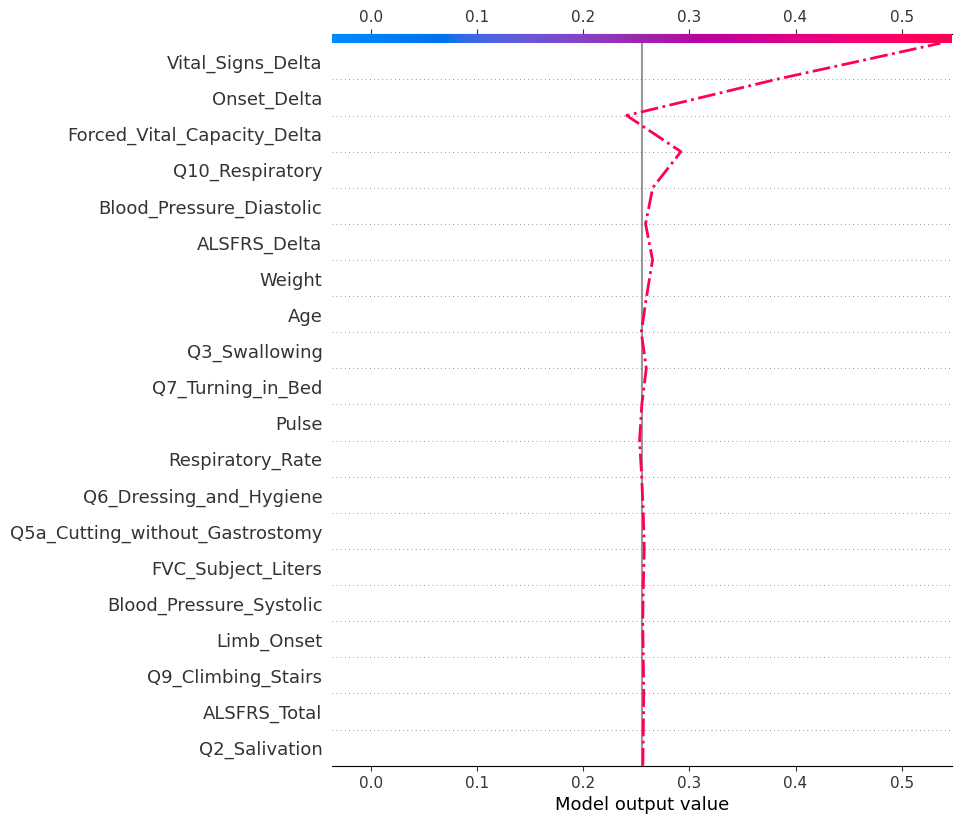

In [ ]:
# Compute base value (average prediction of the model on the training set)
base_value = np.mean(model.predict(X_train))

# Compute SHAP values using PermutationExplainer
explainer = shap.PermutationExplainer(model.predict, X_test)
shap_values = explainer.shap_values(X_test)

# Plot SHAP decision plot for the first prediction (index 0)
shap.decision_plot(base_value, shap_values[0], feature_names=feature_names, highlight=0)

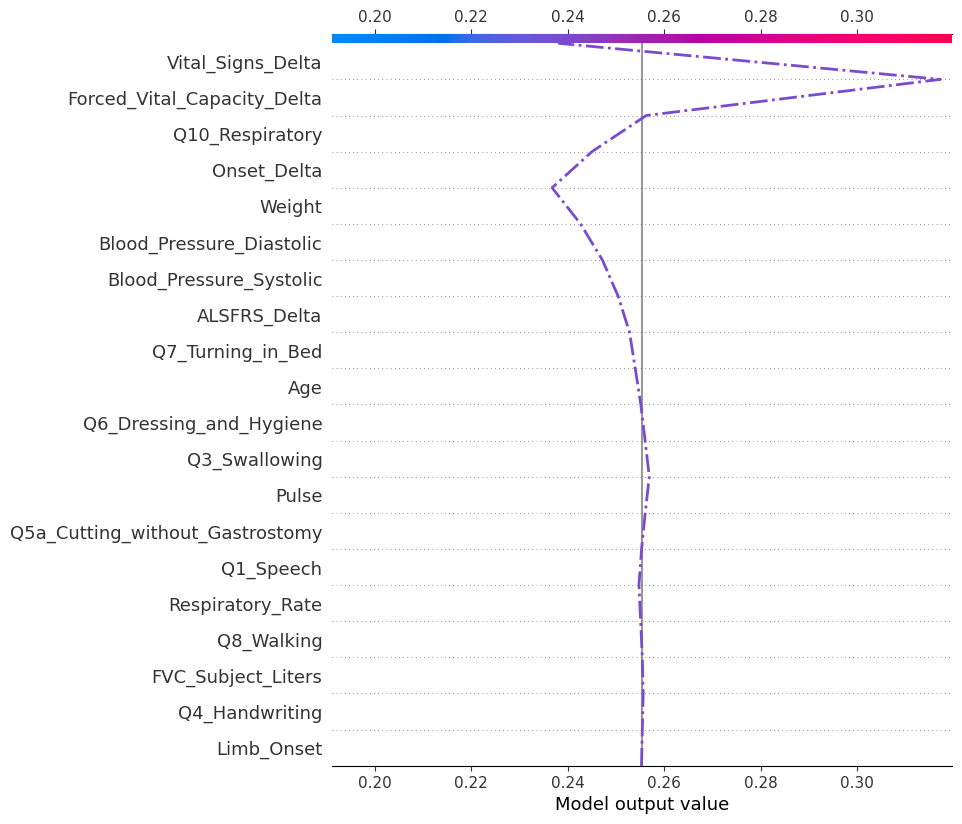

In [ ]:
# Plot SHAP decision plot for the first prediction (index 0)
shap.decision_plot(base_value, shap_values[3], feature_names=feature_names, highlight=0)

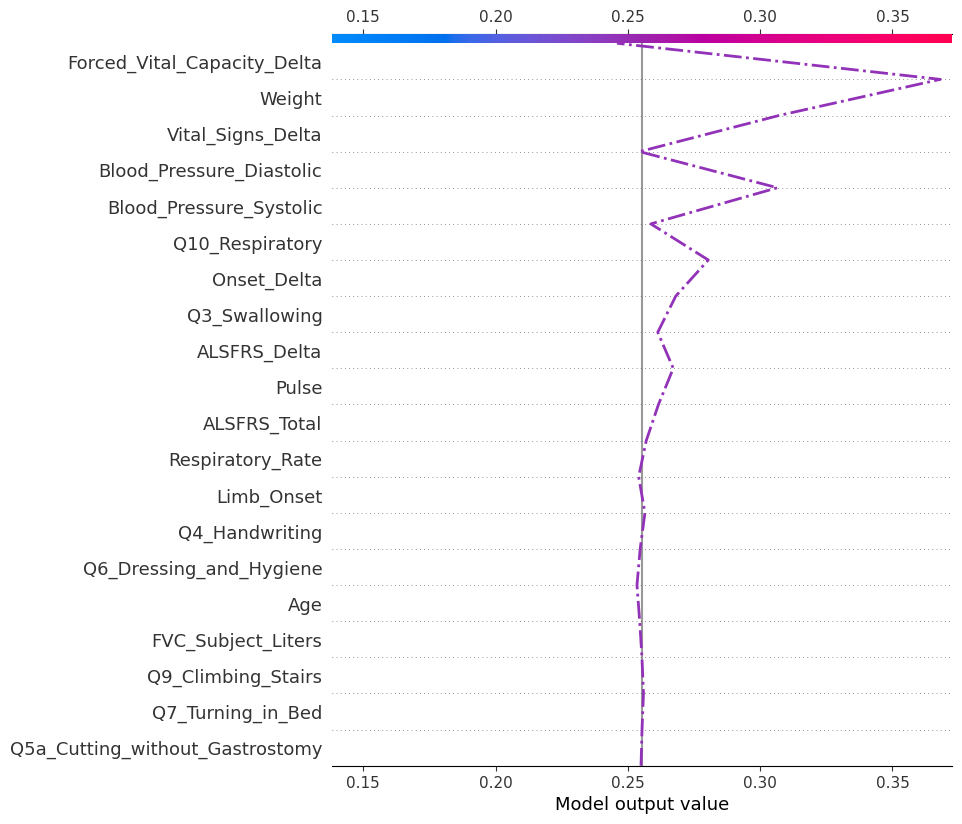

In [ ]:
# Plot SHAP decision plot for the first prediction (index 0)
shap.decision_plot(base_value, shap_values[29], feature_names=feature_names, highlight=0)

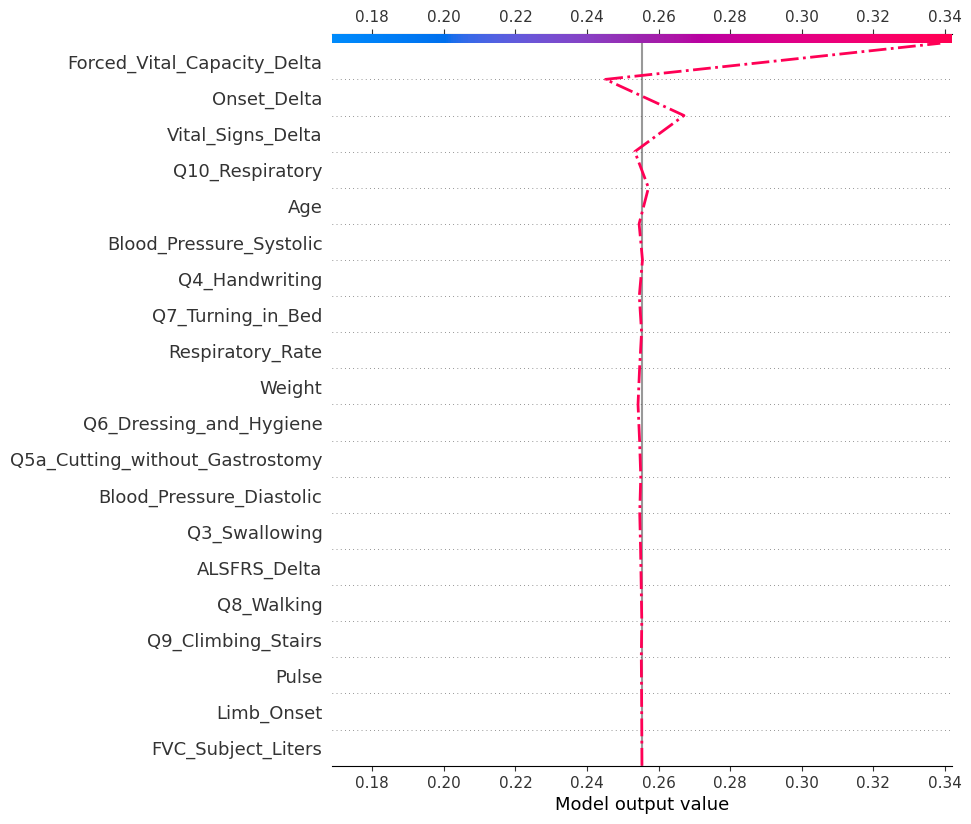

In [ ]:
# Plot SHAP decision plot for the first prediction (index 0)
shap.decision_plot(base_value, shap_values[50], feature_names=feature_names, highlight=0)

In [ ]:
importances = regressor.feature_importances_
indices = np.argsort(importances)
features = boston.feature_names
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Shape of SHAP values: (29, 1)
Shape of features: (30, 29)
<class 'numpy.ndarray'>
[(29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1), (29, 1)]
Reshaped SHAP val

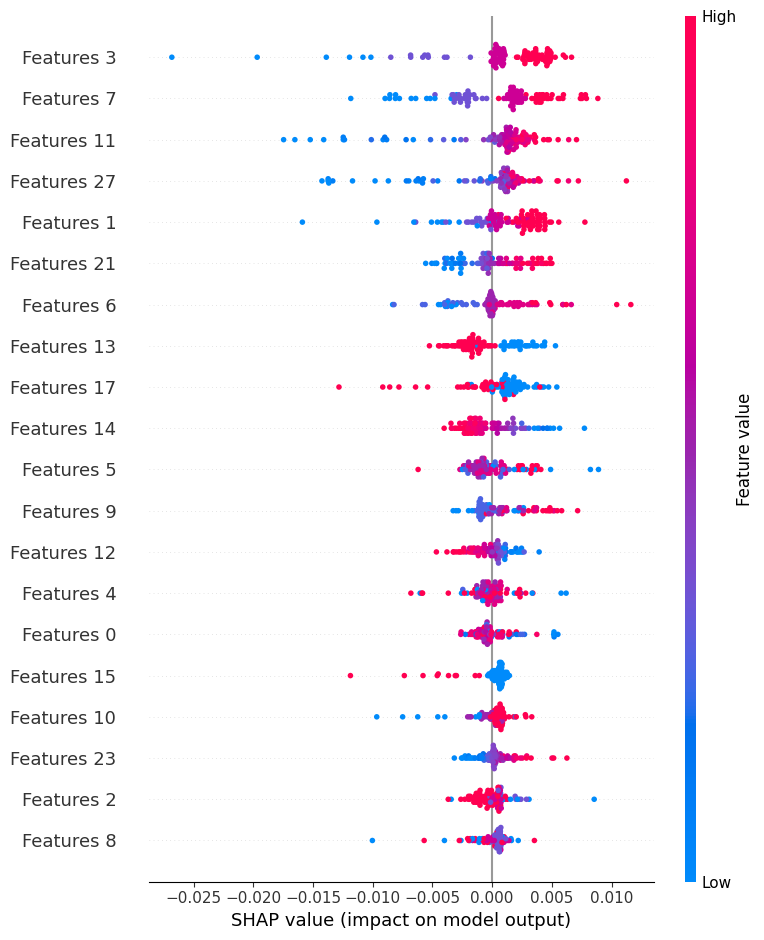

In [ ]:


# Plot summary of SHAP values
# Ensure this matches the structure of your shap_values
correct_shap_values = shap_values[1]

print("Shape of SHAP values:", np.array(correct_shap_values).shape)
print("Shape of features:", X_test[:30].shape)

shap_values_output = explainer.shap_values(X_test[:100])
# For binary classification or single-output models, shap_values_output should be a list with one or two elements
print(type(shap_values_output))
print([np.array(values).shape for values in shap_values_output])

# Assuming shap_values_output correctly contains your SHAP values for plotting
correct_shap_values = shap_values_output[0]  # Adjust based on your model's specifics

# Convert list of arrays to a single array
reshaped_shap_values = np.concatenate([np.array(vals).reshape(1, -1) for vals in shap_values_output], axis=0)

# Now reshaped_shap_values should have the shape (10, 20), matching X_test[:10]
print("Reshaped SHAP values shape:", reshaped_shap_values.shape)

# Attempt to plot with the reshaped SHAP values
shap.summary_plot(reshaped_shap_values, X_test[:100], feature_names=[f'Features {i}' for i in range(X.shape[1])])

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_test.feature_names
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

## LIME

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9fb2b300cfe1e265a410284718fcb74779726b22f03062016ebb5af52dafd250
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=features.columns, class_names=['ALSFRS_slope'], verbose=True, mode='regression')

# Select an instance to explain
instance_idx = 150  # Index of the instance in the test set
instance = X_test[instance_idx].reshape(1, -1)

# Define a prediction function
def predict_fn(X):
    return model.predict(X).flatten()

# Generate explanation for the instance
explanation = explainer.explain_instance(instance[0], predict_fn, num_features=29)

# Display the explanation
explanation.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 1ms/step
Intercept -0.04457691231488475
Prediction_local [-0.01050634]
Right: -0.014883193


# PDP

In [ ]:
# Convert shap_values to numpy array if necessary
shap_values_array = shap_values.values if isinstance(shap_values, shap._explanation.Explanation) else shap_values

# Plot SHAP dependence plot for a specific feature
feature_to_plot = 'Q3_Swallowing'  # Modify with the feature you want to plot
shap.dependence_plot(feature_names.index(feature_to_plot), shap_values_array, X_test, feature_names=feature_names)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
# Plot SHAP dependence plot for a specific feature
feature_to_plot = 'Q3_Swallowing'  # Modify with the feature you want to plot
shap.dependence_plot(feature_names.index(feature_to_plot), shap_values.values, X_test, feature_names=feature_names)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# SHAP

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
X_test.shape


(799, 29)

100/100 [==============================] - 0s 1ms/step


  0%|          | 0/799 [00:00<?, ?it/s]

9988/9988 [==============================] - 12s 1ms/step


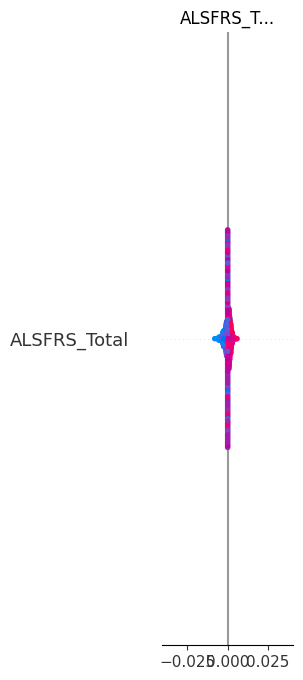

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:

# Apply SHAP
explainer = shap.KernelExplainer(model.predict, X_train, link="identity")
shap_values = explainer.shap_values(X_test, nsamples=799)

# Visualize the SHAP values
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=features.columns)

# Optional: Force plot for the first instance
shap.force_plot(explainer.expected_value, shap_values[0], features.iloc[0], feature_names=features.columns)

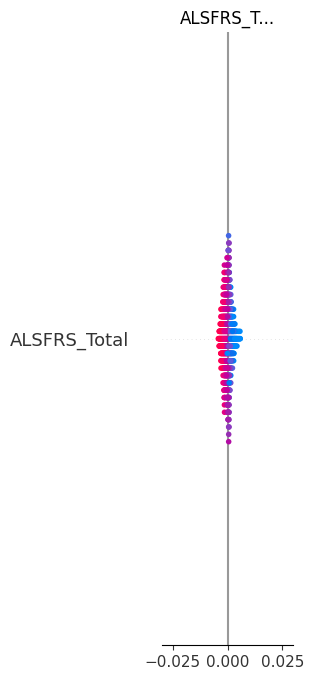

In [ ]:
# Visualize the SHAP values
shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=features.columns)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][1], X_test[0], feature_names=features.columns)

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap
import numpy as np
from sklearn.cluster import KMeans

# Define the number of clusters
K = 50  # Adjust K according to your data size and computational power

# Use K-means to summarize the background data
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X_train)
X_train_summary = kmeans.cluster_centers_

# Initialize the SHAP explainer with the summarized background data
explainer = shap.KernelExplainer(model.predict, X_train_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2/2 [==============================] - 0s 3ms/step


In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/799 [00:00<?, ?it/s]

3285/3285 [==============================] - 4s 1ms/step


# CNN

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as K

target and feature selection

In [ ]:
features = ALS[['Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 'Q5a_Cutting_without_Gastrostomy', 'Q6_Dressing_and_Hygiene',  'Q7_Turning_in_Bed', 'Q8_Walking',	'Q9_Climbing_Stairs',  'Q10_Respiratory',	'ALSFRS_Delta', 'ALSFRS_Total', 'Age',  'Sex',  'Onset_Delta', 'Bulbar_Onset', 'Limb_Bulbar_Onset', 'Limb_Onset',  'Spine_Onset', 'Other_Onset', 'FVC_Subject_Liters', 'Forced_Vital_Capacity_Delta', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Systolic', 'Pulse', 'Respiratory_Rate', 'Weight', 'Vital_Signs_Delta','Blood_Urea_Nitrogen_BUN']]  # Example feature columns
target = ALS['ALSFRS_Slope']  # target column

split

In [ ]:
# Convert the DataFrame to NumPy arrays
X = features.values
y = target.values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardise Date

Define RMSD

In [ ]:
def root_mean_squared_deviation(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

Build Model

In [ ]:
model=Sequential()

# Convolutional layers
model.add(Conv2D(16, (1, 1), activation='sigmoid', input_shape=(X_train.shape[1], 1, 1)))
model.add(Conv2D(16, (1, 1), activation='sigmoid'))
# Flatten the output from conv layers to feed into dense layers
model.add(Flatten())
#Dense (hidden) layers w/ dropout
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.05))
# Output layer (assuming regression task)
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['mean_absolute_error', 'mean_squared_error', root_mean_squared_deviation])


Train Model

Evaluate

Visualise